<a href="https://colab.research.google.com/github/ayushsvt/Machine-Learning/blob/main/CNN_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import tensorflow as tf


In [32]:
(train_imgs, train_labels),(test_imgs, test_labels) = tf.keras.datasets.cifar10.load_data()

In [33]:
print(train_imgs.shape)
print(train_labels.shape)
print(test_imgs.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [34]:
def get_labels(idx):
  labels = ['airplane','automoblie','bird','cat','deer','dog','frog','horse','ship','truck']
  return labels[idx]

In [35]:
import matplotlib.pyplot as plt


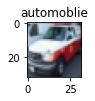

In [36]:
img = train_imgs[60]
plt.figure(figsize=(1,1))
plt.imshow(img)
plt.title(get_labels(train_labels[60][0]))
plt.show()

In [37]:
model = tf.keras.Sequential()

In [38]:
model.add(
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu')
)

In [39]:
model.add(
    tf.keras.layers.MaxPool2D()
)

In [40]:
model.add(
    tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu')
)

In [41]:
model.add(
    tf.keras.layers.MaxPool2D()
)

In [42]:
model.add(
    tf.keras.layers.Flatten()
)

In [43]:
model.add(
    tf.keras.layers.Dense(units=28,activation='relu')
)

In [44]:
model.add(
    tf.keras.layers.Dense(units=10,activation='softmax')
)

In [45]:
model.compile(
    optimizer= 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 576)               0         
                                                                 
 dense_2 (Dense)             (None, 28)               

In [48]:
history = model.fit(train_imgs, train_labels,validation_data=[test_imgs,test_labels],epochs=25)

Epoch 1/25
1563/1563 [==============================] - 55s 35ms/step - loss: 2.3029 - accuracy: 0.0982 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/25
1563/1563 [==============================] - 55s 35ms/step - loss: 2.3029 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/25
1563/1563 [==============================] - 54s 35ms/step - loss: 2.3029 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/25
1563/1563 [==============================] - 74s 47ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/25
1563/1563 [==============================] - 54s 34ms/step - loss: 2.3028 - accuracy: 0.0967 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/25
1563/1563 [==============================] - 55s 35ms/step - loss: 2.3028 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/25
1563/1563 [==============================] - 56s 36ms/step - loss: 2.3028 - accuracy: 0.0971 - val_loss: 2.3026 -

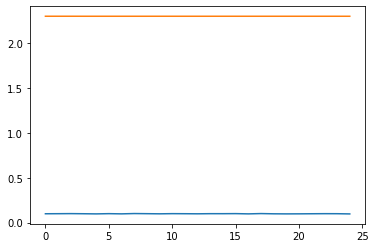

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.show()

In [50]:
model.save('cifar10.hs')

INFO:tensorflow:Assets written to: cifar10.hs/assets


INFO:tensorflow:Assets written to: cifar10.hs/assets


In [51]:
loaded_model = tf.keras.models.load_model('cifar10.hs')

In [52]:
model.input.shape

TensorShape([None, 32, 32, 3])

Prediction

In [53]:
from PIL import Image
import requests
import numpy as np
import io

In [54]:
img = tf.keras.preprocessing.image.load_img('/content/ship.png')
img_arr = tf.keras.preprocessing.image.img_to_array(img)
img_arr.resize((32,32,3))
img_arr = np.expand_dims(img_arr, axis=0)
print(img_arr.shape)
output = loaded_model.predict(img_arr)
get_labels(output.argmax())

(1, 32, 32, 3)


'automoblie'

In [55]:
for i in range(200):
  olabel = get_labels(test_labels[i][0])
  plabel = get_labels(loaded_model.predict(np.array([test_imgs[i]])).argmax())
  print('❌') if olabel != plabel else print('✅')
  print('original',olabel)
  print('prediction',plabel)
  print('------------------------------')

❌
original cat
prediction automoblie
------------------------------
❌
original ship
prediction automoblie
------------------------------
❌
original ship
prediction automoblie
------------------------------
❌
original airplane
prediction automoblie
------------------------------
❌
original frog
prediction automoblie
------------------------------
❌
original frog
prediction automoblie
------------------------------
✅
original automoblie
prediction automoblie
------------------------------
❌
original frog
prediction automoblie
------------------------------
❌
original cat
prediction automoblie
------------------------------
✅
original automoblie
prediction automoblie
------------------------------
❌
original airplane
prediction automoblie
------------------------------
❌
original truck
prediction automoblie
------------------------------
❌
original dog
prediction automoblie
------------------------------
❌
original horse
prediction automoblie
------------------------------
❌
original truc